In [7]:
base = "D:/Github/AD_Networking/"

In [1]:
import networkx as nx
import pandas as pd

In [3]:
# posAD_M = pd.read_csv('AD_Specific_Edges/AD Specific Edges.csv', index_col=0)

In [8]:
sparseFull = pd.read_csv(base + 'AD_Specific_Edges/Alzheimers specific edges.csv')


In [6]:
sparseFull.head()

,Unnamed: 0,Unnamed: 1,Value
0,SH3BGRL,PRKD2,-1
1,RAP1B,KIF21B,-1
2,MLF2,VKORC1L1,-1
3,MLF2,TTC39B,-1
4,PIK3R5,SNAP23,-1


In [9]:
G = nx.Graph()

for i in range(len(sparseFull)):
    G.add_edge(sparseFull.iloc[i,0], sparseFull.iloc[i,1], weight = sparseFull.iloc[i,2])

In [10]:
coms = nx.community.louvain_communities(G, weight='weight')

In [14]:
def buildNumberedCommunityDict(coms):
    groupNum = 1
    groupDict = {}
    for group in coms:
        for node in group:
            groupDict[node] = groupNum
        groupNum += 1
    return groupDict

In [22]:
print("There are", len(coms), "communities with this partitioning.")

count = 1
for group in coms:
    print(count, ":", len(group))
    count += 1

There are 25 communities with this partitioning.
1 : 1168
2 : 2
3 : 2
4 : 5
5 : 2
6 : 591
7 : 2
8 : 1018
9 : 1019
10 : 32
11 : 2
12 : 444
13 : 3
14 : 4
15 : 2
16 : 2
17 : 2
18 : 2
19 : 2
20 : 2
21 : 2
22 : 2
23 : 4
24 : 5
25 : 4


In [11]:
nx.set_node_attributes(G, buildNumberedCommunityDict(coms), "Community_Louvain")

There are 25 communities with this partitioning.


In [17]:
# #Get Newman-Girvan modularity community partitioning
# newman_gen = nx.community.girvan_newman(G)

In [12]:
#Get greedy modularity community partitioning
greedy_coms = nx.community.greedy_modularity_communities(G)

nx.set_node_attributes(G, buildNumberedCommunityDict(greedy_coms), "Greedy Community")

In [23]:
print("There are", len(greedy_coms), "communities with this partitioning.")

count = 1
for group in greedy_coms:
    print(count, ":", len(group))
    count += 1

There are 40 communities with this partitioning.
1 : 1624
2 : 1537
3 : 996
4 : 35
5 : 20
6 : 17
7 : 7
8 : 6
9 : 5
10 : 5
11 : 4
12 : 4
13 : 4
14 : 4
15 : 3
16 : 3
17 : 3
18 : 2
19 : 2
20 : 2
21 : 2
22 : 2
23 : 2
24 : 2
25 : 2
26 : 2
27 : 2
28 : 2
29 : 2
30 : 2
31 : 2
32 : 2
33 : 2
34 : 2
35 : 2
36 : 2
37 : 2
38 : 2
39 : 2
40 : 2


In [16]:
import ndex2
import getpass
import re

In [17]:
ndexuser = getpass.getpass()

In [18]:
ndexpassword = getpass.getpass()

In [19]:
nw = ndex2.create_nice_cx_from_networkx(G)
nw.set_name("Community Detection on AD Specific Edges")

res = nw.upload_to("www.ndexbio.org", ndexuser, ndexpassword)

newnetwork_uuid = res.split('/')[-1]

print('Network UUID: ' + newnetwork_uuid)
print('Link to view network in NDEx: ' + re.sub('\/v2\/network\/', '/viewer/networks/', res))

Generating CX
Network UUID: ff9073df-03d8-11ee-aa50-005056ae23aa
Link to view network in NDEx: https://www.ndexbio.org/viewer/networks/ff9073df-03d8-11ee-aa50-005056ae23aa


In [ ]:
#Get connected components for G
connected_coms = nx.connected_components(G)
topConnected = max(connected_coms, key=len)

#Get subgraph of G with only top connected component
G_top = G.subgraph(topConnected)

In [44]:
coms_top_lov = nx.community.louvain_communities(G_top, weight='weight')

In [45]:
print("There are", len(coms_top_lov), "communities with this partitioning.")

count = 1
for group in coms:
    print(count, ":", len(group))
    count += 1

There are 10 communities with this partitioning.
1 : 443
2 : 1007
3 : 46
4 : 1128
5 : 590
6 : 1024
7 : 7
8 : 32
9 : 5
10 : 4


In [46]:
nx.set_node_attributes(G_top, buildNumberedCommunityDict(coms), "Community_Louvain")

In [ ]:
# Get Leiden community partitioning
leiden_coms = nx.community.leiden(G_top, weight='weight')

In [130]:
greedy_coms = nx.community.greedy_modularity_communities(G_top)

nx.set_node_attributes(G_top, buildNumberedCommunityDict(greedy_coms), "Greedy Community")

In [34]:
print("There are", len(greedy_coms), "communities with this partitioning.")

count = 1
for group in greedy_coms:
    print(count, ":", len(group))
    count += 1

There are 24 communities with this partitioning.
1 : 1624
2 : 1537
3 : 996
4 : 35
5 : 20
6 : 17
7 : 7
8 : 6
9 : 5
10 : 5
11 : 4
12 : 4
13 : 3
14 : 3
15 : 2
16 : 2
17 : 2
18 : 2
19 : 2
20 : 2
21 : 2
22 : 2
23 : 2
24 : 2


In [35]:
# Read in gene set matrix
geneSetMatrix = pd.read_csv(base + 'Gene_By_Set_Hallmark50.csv', index_col=0)

In [60]:
#Reverse a dictionary so that the keys are the values and the values are the keys
def reverseDict(d):
    newDict = {}
    for key in d:
        if d[key] in newDict:
            newDict[d[key]].append(key)
        else:
            newDict[d[key]] = [key]
            
    return newDict

In [136]:
import copy
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

def getGeneSetHeatmap(communityRes, geneSetMatrix, allGenes, figTuple=(20,10)):
    geneSetM = copy.deepcopy(geneSetMatrix)
    comDict = buildNumberedCommunityDict(communityRes)
    comDict = reverseDict(comDict)

    comDF = pd.DataFrame(0, index=allGenes, columns=comDict.keys())
    for gene in allGenes:
        for community in lovDict:
            if gene in comDict[community]:
                comDF.loc[gene, community] = 1
            else:
                comDF.loc[gene, community] = 0

    #Get gene overlap between gene set matrix and louvain communities
    geneOverlap = list(intersection(set(geneSetM.index), set(comDF.index)))

    # Filter lovDF to only include genes in the gene set matrix
    comDF = comDF.loc[geneOverlap]
    #Filter gene set matrix to only include genes in the louvain communities
    geneSetM = geneSetM.loc[geneOverlap]

    comCosine = cosine_similarity(comDF.T, geneSetM.T)

    comCosineDF = pd.DataFrame(comCosine, index=comDF.columns, columns=geneSetM.columns).T
    maxOrder = comCosineDF.max(axis=1).sort_values(ascending=False).index
    comCosineDF = comCosineDF.loc[maxOrder]


    #Include all genes in the heatmap
    plt.figure(figsize=figTuple)
    return sns.heatmap(comCosineDF, cmap="YlGnBu")



<Axes: >

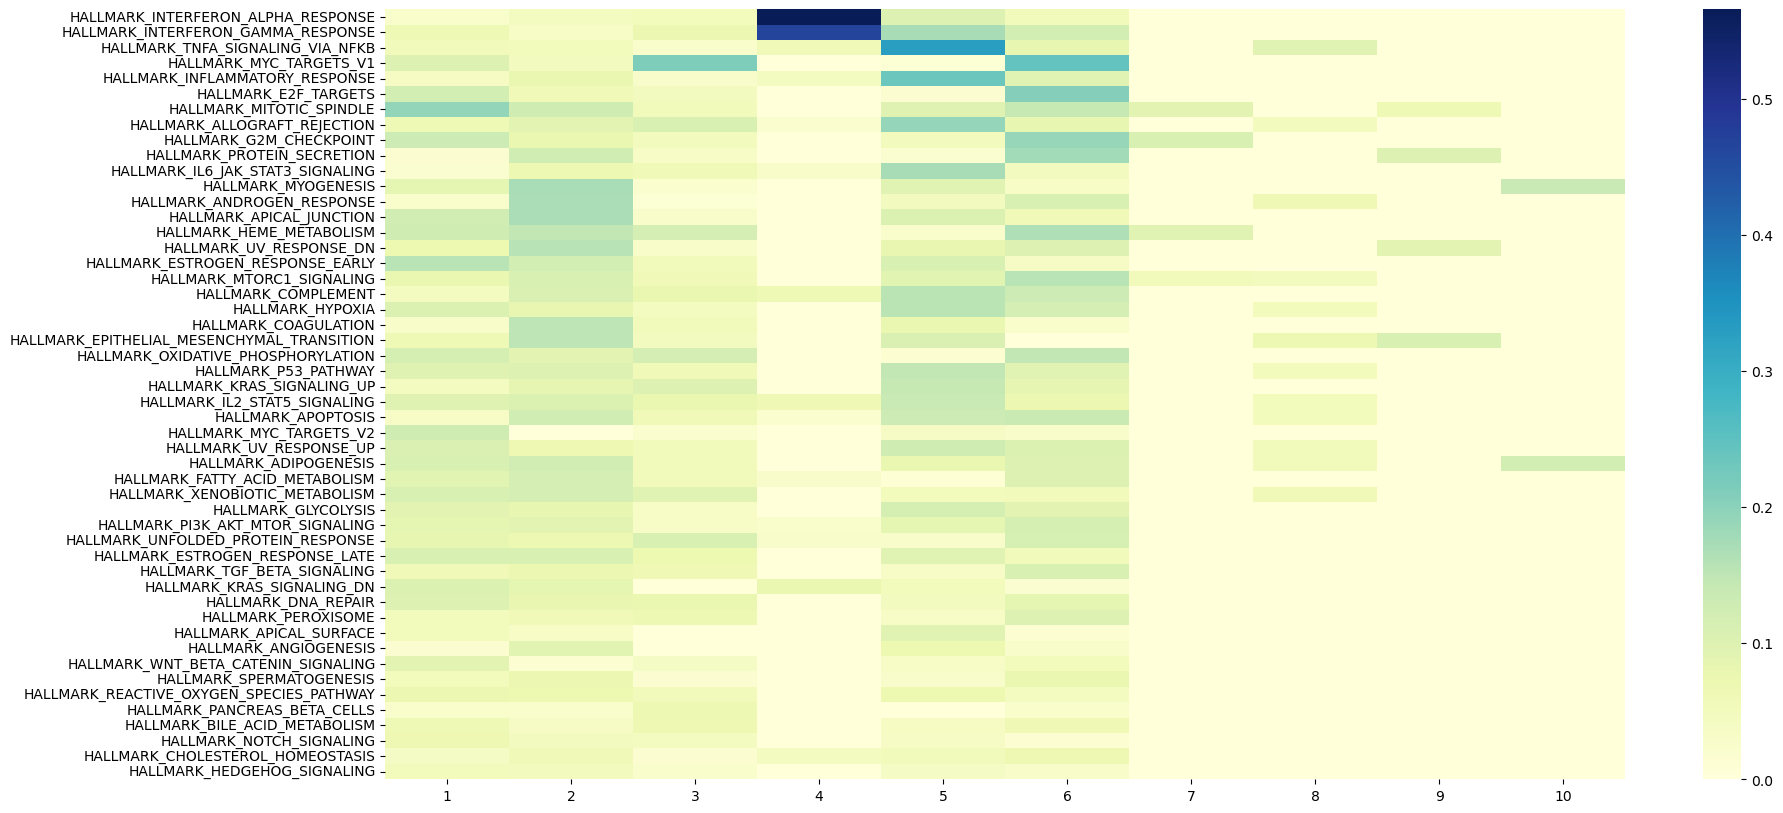

In [137]:
#Adacency to pandas dataframe
allGenes = list(G_top.nodes())

getGeneSetHeatmap(coms_top_lov, geneSetMatrix, allGenes)

In [80]:
# Top Component Louvain Communities to an adjecency matrix
lovDict = buildNumberedCommunityDict(coms_top_lov)
lovDict = reverseDict(lovDict)



#Dataframe with communities as columns and genes as rows with values as 0 or 1
lovDF = pd.DataFrame(0, index=allGenes, columns=lovDict.keys())
for gene in allGenes:
    for community in lovDict:
        if gene in lovDict[community]:
            lovDF.loc[gene, community] = 1
        else:
            lovDF.loc[gene, community] = 0


In [81]:
lovDF.head()

,1,2,3,4,5,6,7,8,9,10
SH3BGRL,0,1,0,0,0,0,0,0,0,0
PRKD2,0,0,0,0,1,0,0,0,0,0
RAP1B,0,1,0,0,0,0,0,0,0,0
KIF21B,1,0,0,0,0,0,0,0,0,0
MLF2,0,0,0,0,1,0,0,0,0,0


In [100]:
#get the interesection of two sets
def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))


In [103]:
#Get gene overlap between gene set matrix and louvain communities
geneOverlap = list(intersection(set(geneSetMatrix.index), set(lovDF.index)))

# Filter lovDF to only include genes in the gene set matrix
lovDF = lovDF.loc[geneOverlap]

#Filter gene set matrix to only include genes in the louvain communities
geneSetMatrix = geneSetMatrix.loc[geneOverlap]


In [105]:
print(lovDF.shape)
print(geneSetMatrix.shape)

(1496, 10)
(1496, 50)


In [111]:
from sklearn.metrics.pairwise import cosine_similarity

lovCosine = cosine_similarity(lovDF.T, geneSetMatrix.T)


In [128]:
lovCosineDF = pd.DataFrame(lovCosine, index=lovDF.columns, columns=geneSetMatrix.columns).T

maxOrder = lovCosineDF.max(axis=1).sort_values(ascending=False).index

lovCosineDF = lovCosineDF.loc[maxOrder]


<Axes: >

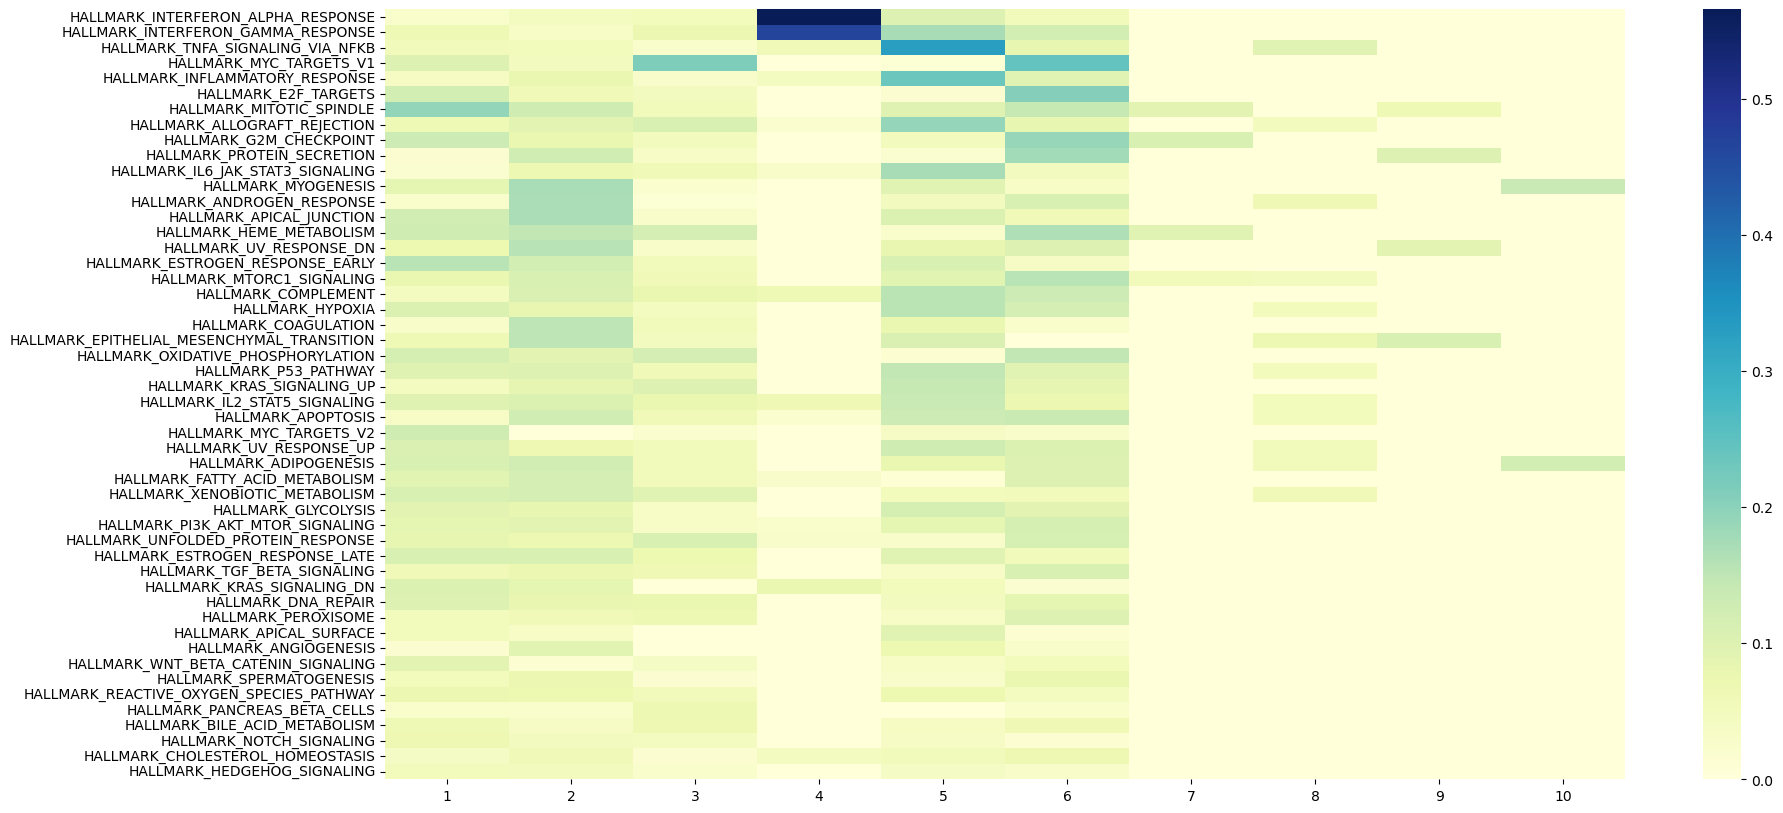

In [129]:
#LovCosine as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

#Include all genes in the heatmap
plt.figure(figsize=(20,10))
sns.heatmap(lovCosineDF, cmap="YlGnBu")